## Task

Practice the ensemble methods with scikit-learn APIs
- Voting(hard, soft)
- Bagging
- Stacking
- Adaboost
- Gradient Boosting
- Compare ensemble methods with weak learns on the wine dataset

### Voting Classifier

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = SVC(probability=True)
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 2, 1, 2, 2, 1])

# Hard voting
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard') # hard voting
eclf1 = eclf1.fit(X, y)
print("Hard voting: ", eclf1.predict(X))
print("Hard voting accuracy: ", eclf1.score(X, y))

# Soft voting
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svc', clf3)],
        voting='soft', weights=[1,1,1]) # soft voting
eclf2 = eclf2.fit(X, y)
print("Soft voting: ", eclf2.predict(X))
print("Soft voting accuracy: ", eclf2.score(X, y))

Hard voting:  [1 1 1 2 2 1]
Hard voting accuracy:  0.8333333333333334
Soft voting:  [1 2 1 2 2 1]
Soft voting accuracy:  1.0


### Bagging Classifier

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

# Generate example data
X, y = make_classification(n_samples=100, n_features=4,
                                n_informative=2, n_redundant=0,
                                random_state=0, shuffle=False)

# Bagging with SVC estimator
clf_svc = BaggingClassifier(estimator=SVC(),
                             n_estimators=20, random_state=42).fit(X, y)
print("SVC Bagging Prediction:", clf_svc.predict([[0, 0, 0, 0]]))
print("SVC Bagging accuracy: ", clf_svc.score(X, y))

# Bagging with DecisionTreeClassifier estimator
clf_dt = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=20, random_state=42).fit(X, y)
print("Decision Tree Bagging Prediction:", clf_dt.predict([[0, 0, 0, 0]]))
print("DT Bagging accuracy: ", clf_dt.score(X, y))

SVC Bagging Prediction: [1]
SVC Bagging accuracy:  0.92
Decision Tree Bagging Prediction: [1]
DT Bagging accuracy:  0.99


### Stacking Classifier

In [4]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
X, y = load_iris(return_X_y=True)

# Set base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]

# Set meta-model estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

### Adaboost

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
print("Predicted label: ", clf.predict([[0, 0, 0, 0]]))
print("Adaboost accuracy: ", clf.score(X, y))

Predicted label:  [1]
Adaboost accuracy:  0.96


### Gradient Boosting

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
print("Predicted label: ", clf.predict(X_test[:10]))
print("Gradient Boosting accuracy: ", clf.score(X_test, y_test))


Predicted label:  [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1.]
Gradient Boosting accuracy:  0.913


## Compare ensemble methods with weak learners on wine dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    StackingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Binary classification for ROC/AUC (considering only two classes)
X_binary = X[y != 2]
y_binary = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


In [8]:
# Weak Learners
weak_learners = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'SVC': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
}

# Ensemble Methods
ensemble_methods = {
    'Bagging (Decision Tree)': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    'Random Forest': RandomForestClassifier(n_estimators=50),
    'Stacking': StackingClassifier(
        estimators=[('svc', SVC(probability=True)), ('dt', DecisionTreeClassifier())],
        final_estimator=LogisticRegression(max_iter=1000)
    ),
    'AdaBoost (Decision Tree)': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    'Gradient Boosting (Decision Tree)': GradientBoostingClassifier(n_estimators=50),
}

# Train and evaluate
all_models = {**weak_learners, **ensemble_methods} #Combine two dict.
accuracies = {}
roc_auc_scores = {}

for name, model in all_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

    if name in ['Logistic Regression', 'SVC', 'Stacking', 'AdaBoost (Decision Tree)', 'Gradient Boosting (Decision Tree)']:
        model.fit(X_train_binary, y_train_binary)
        try:
            y_pred_proba = model.predict_proba(X_test_binary)[:, 1]
            roc_auc_scores[name] = roc_auc_score(y_test_binary, y_pred_proba)
        except AttributeError:
            roc_auc_scores[name] = np.nan
    else:
        roc_auc_scores[name] = np.nan

# Print accuracies
print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Model Accuracies:
Logistic Regression: 0.9815
SVC: 0.7593
Decision Tree: 0.9630
Bagging (Decision Tree): 0.9444
Random Forest: 1.0000
Stacking: 0.9630
AdaBoost (Decision Tree): 0.9630
Gradient Boosting (Decision Tree): 0.9074


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


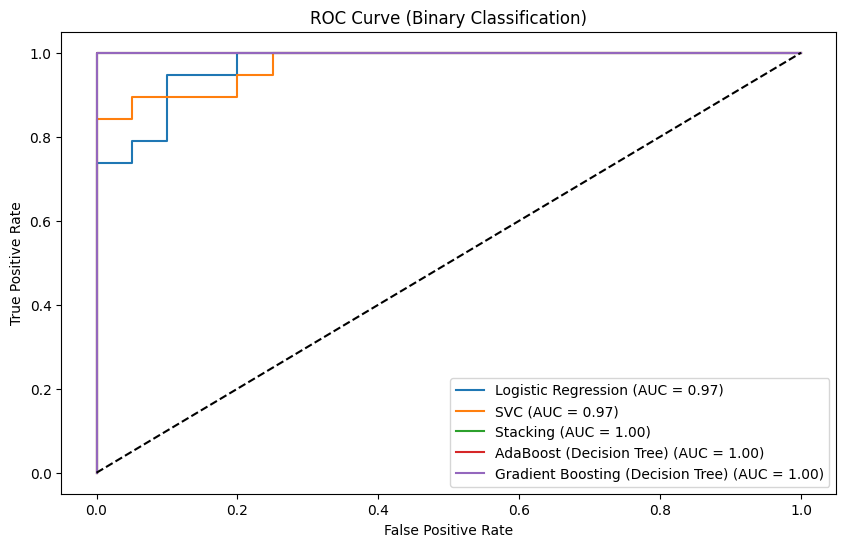

In [9]:
# ROC Curve plot
plt.figure(figsize=(10, 6))
for name in ['Logistic Regression', 'SVC', 'Stacking', 'AdaBoost (Decision Tree)', 'Gradient Boosting (Decision Tree)']:
    if name in ['Logistic Regression', 'SVC', 'Stacking', 'AdaBoost (Decision Tree)', 'Gradient Boosting (Decision Tree)']:
        model = all_models[name]
        model.fit(X_train_binary, y_train_binary)
        try:
            y_pred_proba = model.predict_proba(X_test_binary)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        except AttributeError:
            pass

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Binary Classification)')
plt.legend(loc='lower right')
plt.show()

## Your work

Practice the sklearn ensemble methods: voting, stacking, bagging, adaboost and gradient boosting. Example is accessible via the link below.

https://scikit-learn.org/stable/api/sklearn.ensemble.html

**Submit your notebook in PDF format to BrightSpace by 3/30/2025 11:59 pm.**

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = load_iris() # Load the iris dataset
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

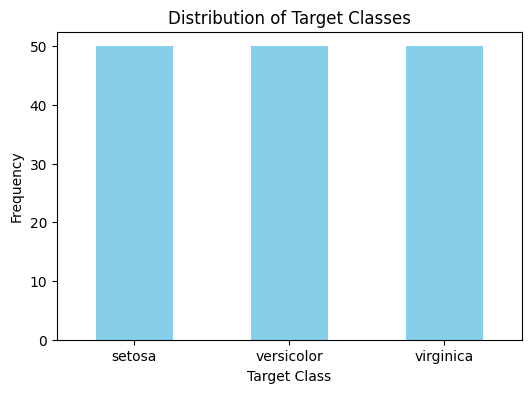

In [12]:
plt.figure(figsize=(6, 4))
data['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names, rotation=0)
plt.show()

In [13]:
data.fillna(data.mean(), inplace=True)
scaler = StandardScaler()
feature_columns = iris.feature_names  # Numerical feature columns
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Display the first few rows of the preprocessed dataset
print("\nFirst 5 rows of the preprocessed dataset:")
data.head()


First 5 rows of the preprocessed dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [ ]:
X = data[iris.feature_names]  # Features
y = data['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
log_clf = LogisticRegression(random_state=42)
svc_clf = SVC(probability=True, random_state=42)  
dt_clf = DecisionTreeClassifier(random_state=42)

#Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logistic', log_clf),
        ('svm', svc_clf),
        ('decision_tree', dt_clf)
    ],
    voting='soft'
)

#train the Voting Classifier
voting_clf.fit(X_train, y_train)

#make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of Voting Classifier: {accuracy_voting:.2f}")

Accuracy of Voting Classifier: 0.93


In [ ]:
base_models = [
    ('logistic', LogisticRegression(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),  # Enable probability for compatibility
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]

meta_model = LogisticRegression(random_state=42)

#create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  #ouse 5-fold cross-validation for meta-model training
)

#train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

#make predictions on the test set
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Classifier: {accuracy_stacking:.2f}")

Accuracy of Stacking Classifier: 0.97


In [ ]:
bagging_clf = BaggingClassifier(
    estimator=SVC(),
    n_estimators=50,  
    random_state=42
)


#train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

#make predictions on the test set
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.2f}")

Accuracy of Bagging Classifier: 0.97


In [ ]:
adaboost_clf = AdaBoostClassifier(n_estimators=50,
    random_state=42
)

#train the AdaBoost Classifier
adaboost_clf.fit(X_train, y_train)

#make predictions on the test set
y_pred_adaboost = adaboost_clf.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy of AdaBoost Classifier: {accuracy_adaboost:.2f}")

Accuracy of AdaBoost Classifier: 0.93


In [24]:
gb_clf_default = GradientBoostingClassifier(random_state=42)

#train the Gradient Boosting Classifier with default parameters
gb_clf_default.fit(X_train, y_train)

#make predictions on the test set
y_pred_gb_default = gb_clf_default.predict(X_test)

#evaluate the Gradient Boosting Classifier with default parameters
accuracy_gb_default = accuracy_score(y_test, y_pred_gb_default)
print(f"Accuracy of Gradient Boosting Classifier (default parameters): {accuracy_gb_default:.2f}")


Accuracy of Gradient Boosting Classifier (default parameters): 0.97
